# Import libs

In [1]:
import pandas as pd
import numpy as np
from dmc.dmc import dmc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Instantiating model

In [4]:
dmc_model = dmc(type_distance_calc='euclidean')

# Running the tests and computing informations

In [5]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    dmc_model.fit(X_train, y_train)

    hit_rate_list.append(dmc_model.score(X_test, y_test))

    y_pred = [dmc_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [6]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.8666666666666667, 1.0, 0.9, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 1.0, 0.9, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9, 0.9333333333333333]

Accuracy:
0.9283333333333333

Standard Deviation:
0.03840572873934303

Confusion Matrix:
[[ 6  0  0]
 [ 0  8  1]
 [ 0  3 12]]
[[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]
[[11  0  0]
 [ 0  6  2]
 [ 0  1 10]]
[[11  0  0]
 [ 0 10  1]
 [ 0  3  5]]
[[ 8  0  0]
 [ 0  5  0]
 [ 0  3 14]]
[[13  0  0]
 [ 0  5  1]
 [ 0  1 10]]
[[ 8  0  0]
 [ 0 14  1]
 [ 0  1  6]]
[[11  0  0]
 [ 0 10  1]
 [ 0  1  7]]
[[ 8  0  0]
 [ 0  6  2]
 [ 0  1 13]]
[[ 9  0  0]
 [ 0 11  0]
 [ 0  2  8]]
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
[[ 7  0  0]
 [ 0 10  0]
 [ 0  3 10]]
[[11  0  0]
 [ 0  7  1]
 [ 0  1 10]]
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
[[ 7  0  0]
 [ 0 10  1]
 [ 0  1 11]]
[[ 9  0  0]
 [ 0 14  1]
 [ 0  0  6]]
[[10 

# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
31            5.4          3.4
102           7.1          3.0
123           6.3          2.7
137           6.4          3.1
140           6.7          3.1
..            ...          ...
54            6.5          2.8
39            5.1          3.4
27            5.2          3.5
74            6.4          2.9
110           6.5          3.2

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
84            5.4          3.0
15            5.7          4.4
126           6.2          2.8
81            5.5          2.4
35            5.0          3.2
32            5.2          4.1
134           6.1          2.6
47            4.6          3.2
114           5.8          2.8
18            5.7          3.8
92            5.8          2.6
57            4.9          2.4
127           6.1          3.0
58            6.6          2.9
21            5.1          3.7
115           6.4          3.2
3             4.6          3.1
36            5.5

# Training the model with the new dataset 2d

In [8]:
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

# Plotting decision surface

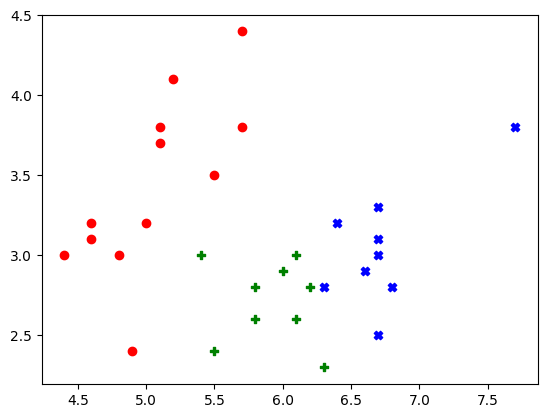

In [9]:
data = X_test_2d[:][:].values

y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(y_pred == 'Iris-setosa')
virginica = np.where(y_pred == 'Iris-virginica')
versicolor = np.where(y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='blue', marker='X', label='virginica')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='green', marker='P', label='versicolor')

plt.show()